In [1]:
import pandas as pd

In [2]:
trials = pd.read_csv('mnist_014_trials.csv',index_col=0)

In [3]:
trials.head()

,auto_rewarded,change_contrast,change_frame,change_image_category,change_image_name,change_ori,change_time,delta_ori,index,initial_contrast,...,cumulative_volume,filepath,filename,reward_rate,trial_type,response,trial_length,endframe,color,lick_frames
0,True,1,150.0,4.0,51312.0,180.0,2.501726,90,0,1,...,0.007,./data,170123143144-task=DoC_MNIST_stage=0v1_probes_n...,inf,go,NaN,5.505390,329,darkblue,"[248, 259, 267, 274, 282, 289, 297, 306, 315, ..."
1,NaN,1,NaN,NaN,NaN,NaN,NaN,90,1,1,...,0.007,./data,170123143144-task=DoC_MNIST_stage=0v1_probes_n...,inf,aborted,NaN,4.003337,569,lightgray,"[333, 343, 352, 360, 370, 379, 425, 434, 443, ..."
2,NaN,1,NaN,NaN,NaN,NaN,NaN,90,2,1,...,0.007,./data,170123143144-task=DoC_MNIST_stage=0v1_probes_n...,inf,aborted,NaN,2.001682,689,lightgray,"[573, 581, 590, 599, 607]"
3,NaN,1,NaN,NaN,NaN,NaN,NaN,90,3,1,...,0.007,./data,170123143144-task=DoC_MNIST_stage=0v1_probes_n...,inf,aborted,NaN,3.002550,869,lightgray,"[767, 776, 786]"
4,NaN,1,NaN,NaN,NaN,NaN,NaN,90,4,1,...,0.007,./data,170123143144-task=DoC_MNIST_stage=0v1_probes_n...,inf,aborted,NaN,8.006803,1349,lightgray,"[1009, 1018, 1025, 1033, 1041, 1051, 1061, 107..."


In [4]:
trials.groupby(['mouse_id','date']).size()
#trials.groupby(['mouse_id','date'])['lick'].mean()

mouse_id  date      
M258089   2017-01-23     897
          2017-01-24     806
          2017-01-25     729
          2017-01-26     679
          2017-01-27     692
M258173   2017-01-23     947
          2017-01-24     694
          2017-01-25     677
          2017-01-26     808
          2017-01-27     727
M258194   2017-01-24     689
          2017-01-25     738
          2017-01-26     724
          2017-01-27     832
M258274   2017-01-23     696
          2017-01-24     684
          2017-01-25     924
          2017-01-26     683
          2017-01-27     740
M258275   2017-01-23     771
          2017-01-24     736
          2017-01-25     687
          2017-01-26     681
          2017-01-27     681
M261584   2017-01-23     806
          2017-01-25     718
          2017-01-26     796
          2017-01-27     695
M271966   2017-01-24     744
          2017-01-25     915
          2017-01-26     692
          2017-01-27     681
M272465   2017-01-24     971
          2017-01-25  

In [5]:
mask = (
    (trials['auto_rewarded']!=True)
    & trials['trial_type'].isin(['go','catch'])
#     & (trials['mnist_probe_trial']==False)
)
trials['lick'] = trials['response']>0

trials['category_change'] = trials['initial_image_category']!=trials['change_image_category']
trials['image_change'] = trials['initial_image_name']!=trials['change_image_name']

trials = trials[mask]

trials.groupby(['mouse_id','date']).size()

mouse_id  date      
M258089   2017-01-23      3
          2017-01-24    201
          2017-01-25    301
          2017-01-26    357
          2017-01-27    556
M258173   2017-01-23    169
          2017-01-24    635
          2017-01-25    636
          2017-01-26    250
          2017-01-27    482
M258194   2017-01-24    630
          2017-01-25    505
          2017-01-26    561
          2017-01-27    355
M258274   2017-01-23      3
          2017-01-24    601
          2017-01-25    198
          2017-01-26    608
          2017-01-27    443
M258275   2017-01-23    535
          2017-01-24    514
          2017-01-25    598
          2017-01-26    643
          2017-01-27    644
M261584   2017-01-23    129
          2017-01-25    285
          2017-01-26    392
          2017-01-27    531
M271966   2017-01-24    197
          2017-01-25    145
          2017-01-26    307
          2017-01-27    533
M272465   2017-01-24    126
          2017-01-25     60
          2017-01-26    190

In [6]:
for col in ('initial_image_category','initial_image_name','change_image_category','change_image_name'):
    trials[col] = trials[col].astype(int).astype(str)

In [7]:
import seaborn as sns
%matplotlib inline
sns.set_style('white')

In [8]:
import matplotlib.pyplot as plt
def plot_reconstruct(pos,**kwargs):
    return plt.scatter(pos[:,0], pos[:,1],**kwargs)

In [9]:
def perceptual_distance(response_likelihood):
    X = response_likelihood
    X = np.nanmean(np.stack([X,X.T]),axis=0)
    X[np.isnan(X)] = np.nanmean(X)
    X = np.clip(X,0.001,0.999)
    X = -np.log(1-X)
    return X

M258089 ['4' '1' '0']
M258173 ['4' '1' '0']
M258194 ['0' '4' '1']
M258274 ['1' '4' '0']
M258275 ['4' '1' '0']
M261584 ['1' '0' '4']
M271966 ['4' '0' '1']
M272465 ['0' '1' '4']


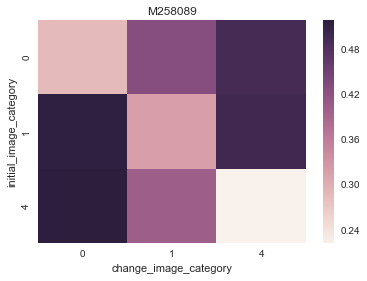

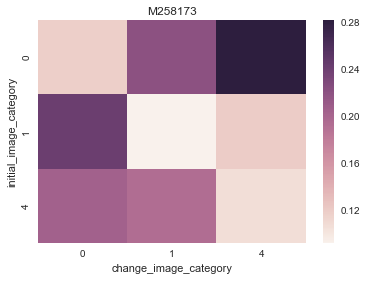

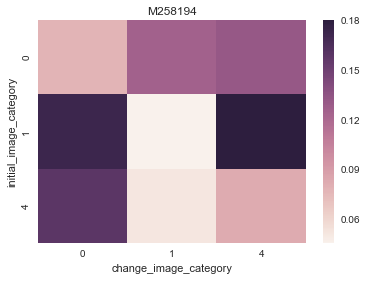

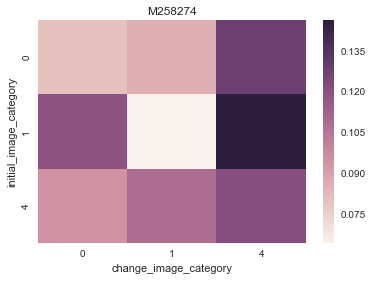

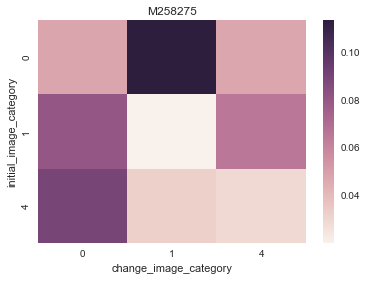

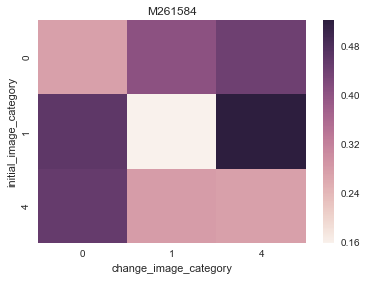

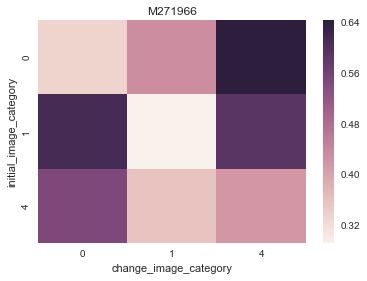

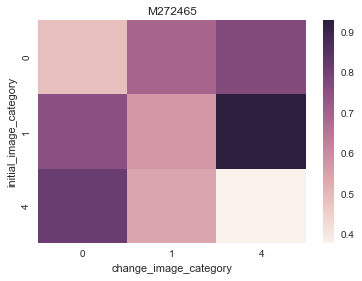

In [10]:
import numpy as np
from sklearn import manifold

#groupby will group dataframe by whatever unique values
#can iterate over groupby object
#spits out key and group (new dataframe)
for mouse,group in trials[trials.mnist_probe_trial==False].groupby(['mouse_id',]):
    try:
        print mouse,group['change_image_category'].unique()

        
        assert len(group['change_image_category'].unique())==3, 'not enough categories'

        #take the smaller df and build a pivot table
        #left is initial image category
        #right is change image category
        #response matrix is another dataframe
        #pivot table default is the mean
        #use aggfunc to pass new function like median 
        #look at group.pivot for only 1 unique combination (really advanced for right now)
        response_matrix = group.pivot_table(
            values = 'lick',
            index = ['initial_image_category'],
            columns = ['change_image_category'],
        )

        plt.figure()
        sns.heatmap(response_matrix)
        plt.title(mouse)

    except (TypeError,ValueError,AssertionError) as e:
        print e
        continue

In [11]:
response_matrix

change_image_category,0,1,4
initial_image_category,,,
0,0.489583,0.696970,0.772727
1,0.756098,0.574074,0.931818
4,0.816327,0.545455,0.381443


In [12]:
import sklearn
sklearn.__version__

'0.17.1'

0 (0.89411765336990356, 0.10196078568696976, 0.10980392247438431)
1 (0.21602460800432691, 0.49487120380588606, 0.71987698697576341)
4 (0.30426760128900115, 0.68329106055054012, 0.29293349969620797)


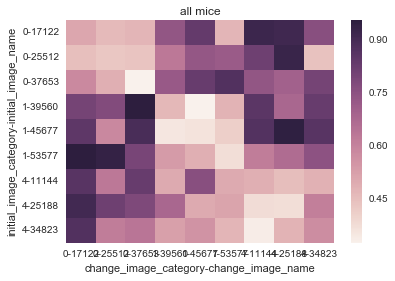

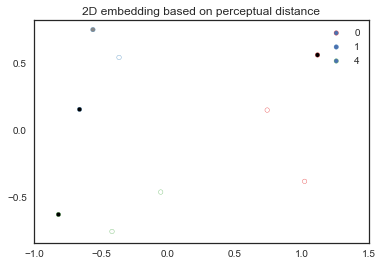

In [13]:
#pandas is built entirely on top of numpy
#
mask = (
    (trials['reward_rate']>2)
    & (trials['mnist_probe_trial']==False)
)

response_matrix = trials[mask].pivot_table(
    values = 'lick',
    #using 2 items for index
    index = ['initial_image_category','initial_image_name'],
    columns = ['change_image_category','change_image_name'],
)
plt.figure()
sns.heatmap(response_matrix)
plt.title('all mice')

X = perceptual_distance(response_matrix.values)
#scikit learn functions
mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9,
               dissimilarity="precomputed", n_jobs=1)
points = mds.fit_transform(X)

cats = response_matrix.index.get_level_values('initial_image_category')
ncat = len(cats.unique())
cmap = sns.color_palette('Set1',ncat)

plt.figure()
for lbl,color in zip(cats.unique(),cmap):
    print lbl,color

    plot_reconstruct(points[cats==lbl],color=color,label=lbl)
plt.axis('equal')
plt.legend()
plt.title('2D embedding based on perceptual distance')

In [14]:
import os
from scipy import misc

def scrub_path(aibsdata_path):
    return (
        aibsdata_path
        .replace('/',os.path.sep)
        .replace('\\',os.path.sep)
        .replace('//aibsdata2','/data')
        .replace('//aibsdata','/data')
    )

def load_pixels(category,name):
    mnist_path = scrub_path(
        '/data/neuralcoding/Justin/Projects/mnist_mouse_behavior/png/training'
    )
    png = os.path.join(mnist_path,category,'{}.png'.format(name))
    
    return misc.imread(png)

In [15]:
def calc_pixel_delta(row,symmetric=False):
    
    initial_image = load_pixels(
        row['initial_image_category'],
        row['initial_image_name'],
        )
    
    change_image = load_pixels(
        row['change_image_category'],
        row['change_image_name'],
        )
    
    delta = change_image - initial_image
    
    if symmetric:
        delta = np.abs(delta)
    
    return delta.ravel()

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

ImportError: No module named model_selection

In [17]:
trials['change'] = trials['trial_type']=='go'

In [18]:
lbls = (
    trials[['initial_image_category','initial_image_name']]
    .drop_duplicates()
    .sort_values('initial_image_category')
    )

In [19]:
for _,row in lbls.iterrows():
    plt.figure(figsize=(2,2))
    exemplar = load_pixels(row['initial_image_category'],row['initial_image_name'])
    
    plt.imshow(exemplar,
               cmap='Greys_r',
               interpolation='none',
              )

IOError: [Errno 2] No such file or directory: '\\data\\neuralcoding\\Justin\\Projects\\mnist_mouse_behavior\\png\\training\\0\\17122.png'

In [20]:
import itertools
from scipy.spatial import distance
from scipy.stats import pearsonr
import pandas as pd

#this list will hold every row that will eventually become a dataframe
dist = []

#loop through so that it generates and every item will be a new row
for (_,initial),(_,change) in itertools.product(lbls.iterrows(),lbls.iterrows()):
    
    initial_image = load_pixels(
        initial['initial_image_category'],
        initial['initial_image_name'],
        )
    
    change_image = load_pixels(
        change['initial_image_category'],
        change['initial_image_name'],
        )
    u = initial_image.ravel().astype(np.float)/255
    v = change_image.ravel().astype(np.float)/255
    
    #adding key value pairs that will be the columns in the df at the end of the day
    dist.append(
        dict(
            initial_image_category = initial['initial_image_category'],
            initial_image_name = initial['initial_image_name'],
            change_image_category = change['initial_image_category'],
            change_image_name = change['initial_image_name'],
            correlation = distance.correlation(u,v),
            euclidean = distance.euclidean(u,v),
            )
    )
#this is now a list of dictionaries
#pandas will create a dataframe from this list
#dist no longer exists as a list, but now as a dataframe
dist = pd.DataFrame(dist)
#do some re-indexing to fix
dist = dist.set_index(['initial_image_category','initial_image_name','change_image_category','change_image_name'])
dist.head(15)

IOError: [Errno 2] No such file or directory: '\\data\\neuralcoding\\Justin\\Projects\\mnist_mouse_behavior\\png\\training\\0\\17122.png'

AttributeError: 'list' object has no attribute 'reset_index'

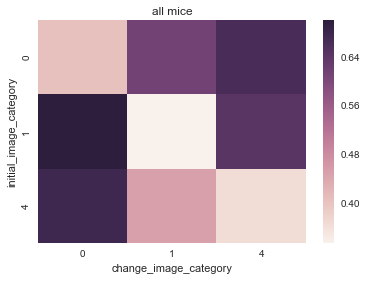

In [21]:
mask = (
    (trials['mnist_probe_trial']==False)
    & (trials['reward_rate']>1)
#     & (trials.date=='2017-01-10')
)

response_matrix = trials[mask].pivot_table(
    values = 'lick',
    index = ['initial_image_category'],#,'initial_image_name'],
    columns = ['change_image_category'],#,'change_image_name'],
)
plt.figure()
sns.heatmap(response_matrix)
plt.title('all mice')


distance_matrix = dist.reset_index().pivot_table(
    values = 'euclidean',
    index = ['initial_image_category'],#,'initial_image_name'],
    columns = ['change_image_category'],#,'change_image_name'],
)
# distance_matrix = np.clip(distance_matrix,0,1)

plt.figure()
sns.heatmap(distance_matrix)
plt.title('euclidean distance')

AttributeError: 'list' object has no attribute 'reset_index'

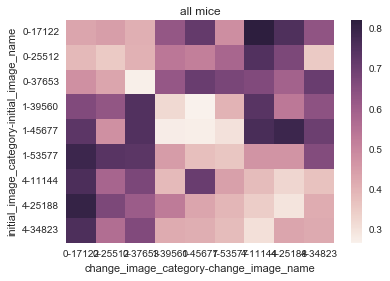

In [22]:
mask = (
    (trials['reward_rate']>1)
    & (trials['mnist_probe_trial']==False)
)

response_matrix = trials[mask].pivot_table(
    values = 'lick',
    index = ['initial_image_category','initial_image_name'],
    columns = ['change_image_category','change_image_name'],
)
plt.figure()
sns.heatmap(response_matrix)
plt.title('all mice')


distance_matrix = dist.reset_index().pivot_table(
    values = 'euclidean',
    index = ['initial_image_category','initial_image_name'],
    columns = ['change_image_category','change_image_name'],
)
distance_matrix = np.clip(distance_matrix,0,np.inf)

plt.figure()
sns.heatmap(distance_matrix)
plt.title('euclidean distance')

In [23]:
sns.jointplot(distance_matrix.values.flatten(),response_matrix.values.flatten())

NameError: name 'distance_matrix' is not defined

In [24]:
dist.reset_index().columns
dist.reset_index().head()
#fixes multilevel index

AttributeError: 'list' object has no attribute 'reset_index'

In [25]:
#join in pandas is similar to join in sql
#by calling join it will use the indices of whatever you are calling
#maintain all data on left and try to find all data it can on right
#if can't find, it will drop a NaN
#look into Inner and Outer

trials = trials.join(
    dist,
    on=['initial_image_category','initial_image_name','change_image_category','change_image_name'],
    how='left',
)

ValueError: Joining multiple DataFrames only supported for joining on index

In [26]:
lm = sns.lmplot('euclidean','lick',data=trials[mask],
           col='mouse_id',col_wrap=4,
           size=2,
           logistic=True,
           ci=False,
           x_bins=np.linspace(0,15,15),
          )
# plt.ylim(-0.05,1.05)
# plt.xlim(-0.05,1.05)
# lm.set_axis_labels('euclidean distance','lick likelihood')

KeyError: "['euclidean'] not in index"

In [52]:
lm = sns.lmplot('euclidean','lick',data=trials[mask],
                logistic=True,
                x_bins=np.linspace(0,15,15),
                hue='trial_type',
                size=3,
          )

KeyError: "['euclidean'] not in index"